In [2]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("Dataset1.csv")
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
# df

/tmp/ipykernel_4791/2795462586.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset1.csv")


{'JUL-2012': [6, 3, 13], 'AUG-2012': [15, 1, 11], 'SEPT-2012': [13, 1, 12], 'OCT-2012': [13, 1, 7], 'NOV-2012': [8, 0, 6], 'DEC-2012': [17, 0, 10]}
Index(['JUL-2012', 'AUG-2012', 'SEPT-2012', 'OCT-2012', 'NOV-2012',
       'DEC-2012'],
      dtype='object')


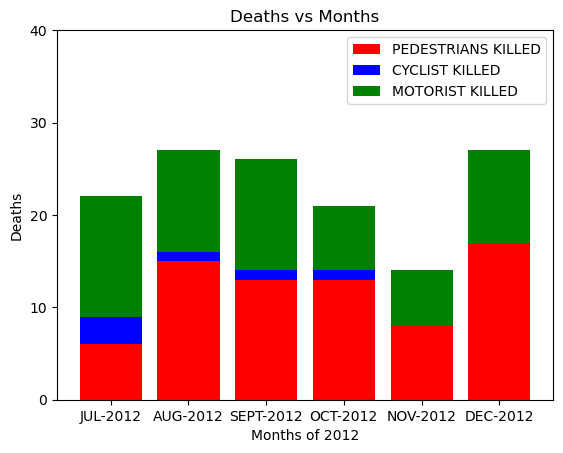

In [44]:
df1 = df[df['CRASH DATE']>='2012-01-01']
df1 = df1[df1['CRASH DATE']<='2012-12-31']
df1.sort_values(by='CRASH DATE',inplace=True)
df1

def custom_month_func(row):
    if row['CRASH DATE']>="2012-07-01" and row['CRASH DATE']<="2012-07-31":
        return "JUL-2012"
    elif row['CRASH DATE']>="2012-08-01" and row['CRASH DATE']<="2012-08-31":
        return "AUG-2012"
    elif row['CRASH DATE']>="2012-09-01" and row['CRASH DATE']<="2012-09-30":
        return "SEPT-2012"
    elif row['CRASH DATE']>="2012-10-01" and row['CRASH DATE']<="2012-10-31":
        return "OCT-2012"
    elif row['CRASH DATE']>="2012-11-01" and row['CRASH DATE']<="2012-11-30":
        return "NOV-2012"
    elif row['CRASH DATE']>="2012-12-01"and row['CRASH DATE']<="2012-12-31":
        return "DEC-2012"
df1['CRASH_MONTH'] = df1.apply(custom_month_func,axis=1)
# dict is for killed and first is ped, second is cyclist, and the third is motorist.
dict = {
    'JUL-2012':[0,0,0],
    'AUG-2012':[0,0,0],
    'SEPT-2012':[0,0,0],
    'OCT-2012':[0,0,0],
    'NOV-2012':[0,0,0],
    'DEC-2012':[0,0,0]
}
for i,row in df1.iterrows():
    if row['CRASH_MONTH']=='JUL-2012':
        dict['JUL-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['JUL-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['JUL-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='AUG-2012':
        dict['AUG-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['AUG-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['AUG-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='SEPT-2012':
        dict['SEPT-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['SEPT-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['SEPT-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='OCT-2012':
        dict['OCT-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['OCT-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['OCT-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='NOV-2012':
        dict['NOV-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['NOV-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['NOV-2012'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='DEC-2012':
        dict['DEC-2012'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['DEC-2012'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['DEC-2012'][2]+=row['NUMBER OF MOTORIST KILLED']

print(dict)
df2=pd.DataFrame.from_dict(dict,orient='index',columns=['PEDESTRIANS KILLED','CYCLIST KILLED','MOTORIST KILLED'])
df2
print(df2.index)

plt.bar(df2.index,df2['PEDESTRIANS KILLED'],color='r')
plt.bar(df2.index,df2['CYCLIST KILLED'],bottom=df2['PEDESTRIANS KILLED'],color='b')
plt.bar(df2.index,df2['MOTORIST KILLED'],bottom=df2['CYCLIST KILLED']+df2['PEDESTRIANS KILLED'],color='g')
plt.xlabel("Months of 2012")
plt.ylabel("Deaths")
plt.legend(["PEDESTRIANS KILLED", "CYCLIST KILLED", "MOTORIST KILLED"])
plt.title("Deaths vs Months")
plt.yticks([0,10,20,30,40])
plt.show()

{'JUL-2012': [855, 450, 3550], 'AUG-2012': [850, 508, 3393], 'SEPT-2012': [893, 434, 3362], 'OCT-2012': [977, 329, 3260], 'NOV-2012': [1037, 277, 2681], 'DEC-2012': [1294, 212, 3085]}
Index(['JUL-2012', 'AUG-2012', 'SEPT-2012', 'OCT-2012', 'NOV-2012',
       'DEC-2012'],
      dtype='object')


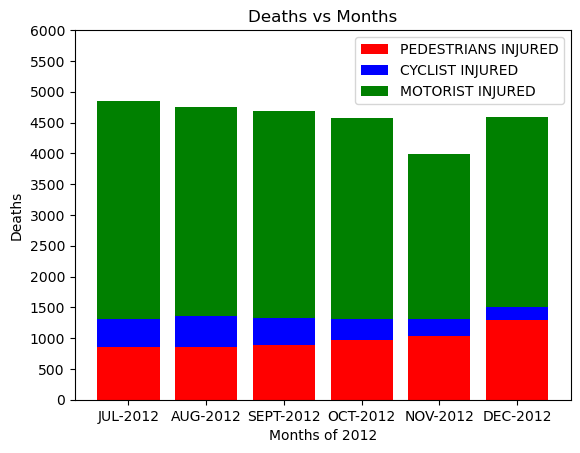

In [48]:
df1 = df[df['CRASH DATE']>='2012-01-01']
df1 = df1[df1['CRASH DATE']<='2012-12-31']
df1.sort_values(by='CRASH DATE',inplace=True)
df1

def custom_month_func(row):
    if row['CRASH DATE']>="2012-07-01" and row['CRASH DATE']<="2012-07-31":
        return "JUL-2012"
    elif row['CRASH DATE']>="2012-08-01" and row['CRASH DATE']<="2012-08-31":
        return "AUG-2012"
    elif row['CRASH DATE']>="2012-09-01" and row['CRASH DATE']<="2012-09-30":
        return "SEPT-2012"
    elif row['CRASH DATE']>="2012-10-01" and row['CRASH DATE']<="2012-10-31":
        return "OCT-2012"
    elif row['CRASH DATE']>="2012-11-01" and row['CRASH DATE']<="2012-11-30":
        return "NOV-2012"
    elif row['CRASH DATE']>="2012-12-01"and row['CRASH DATE']<="2012-12-31":
        return "DEC-2012"
df1['CRASH_MONTH'] = df1.apply(custom_month_func,axis=1)
# dict is for killed and first is ped, second is cyclist, and the third is motorist.
dict = {
    'JUL-2012':[0,0,0],
    'AUG-2012':[0,0,0],
    'SEPT-2012':[0,0,0],
    'OCT-2012':[0,0,0],
    'NOV-2012':[0,0,0],
    'DEC-2012':[0,0,0]
}
for i,row in df1.iterrows():
    if row['CRASH_MONTH']=='JUL-2012':
        dict['JUL-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['JUL-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['JUL-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='AUG-2012':
        dict['AUG-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['AUG-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['AUG-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='SEPT-2012':
        dict['SEPT-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['SEPT-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['SEPT-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='OCT-2012':
        dict['OCT-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['OCT-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['OCT-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='NOV-2012':
        dict['NOV-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['NOV-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['NOV-2012'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='DEC-2012':
        dict['DEC-2012'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['DEC-2012'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['DEC-2012'][2]+=row['NUMBER OF MOTORIST INJURED']

print(dict)
df2=pd.DataFrame.from_dict(dict,orient='index',columns=['PEDESTRIANS INJURED','CYCLIST INJURED','MOTORIST INJURED'])
df2
print(df2.index)

plt.bar(df2.index,df2['PEDESTRIANS INJURED'],color='r')
plt.bar(df2.index,df2['CYCLIST INJURED'],bottom=df2['PEDESTRIANS INJURED'],color='b')
plt.bar(df2.index,df2['MOTORIST INJURED'],bottom=df2['CYCLIST INJURED']+df2['PEDESTRIANS INJURED'],color='g')
plt.xlabel("Months of 2012")
plt.ylabel("Injured")
plt.legend(["PEDESTRIANS INJURED", "CYCLIST INJURED", "MOTORIST INJURED"])
plt.title("Injuresd vs Months")
plt.yticks(range(0,6500,500))
plt.show()

{'JAN-2013': [21, 0, 8], 'FEB-2013': [13, 0, 7], 'MAR-2013': [13, 1, 9], 'APR-2013': [12, 0, 4], 'MAY-2013': [7, 2, 7], 'JUN-2013': [12, 3, 8], 'JUL-2013': [13, 0, 11], 'AUG-2013': [12, 1, 22], 'SEPT-2013': [15, 0, 11], 'OCT-2013': [15, 2, 6], 'NOV-2013': [26, 2, 8], 'DEC-2013': [17, 0, 9]}


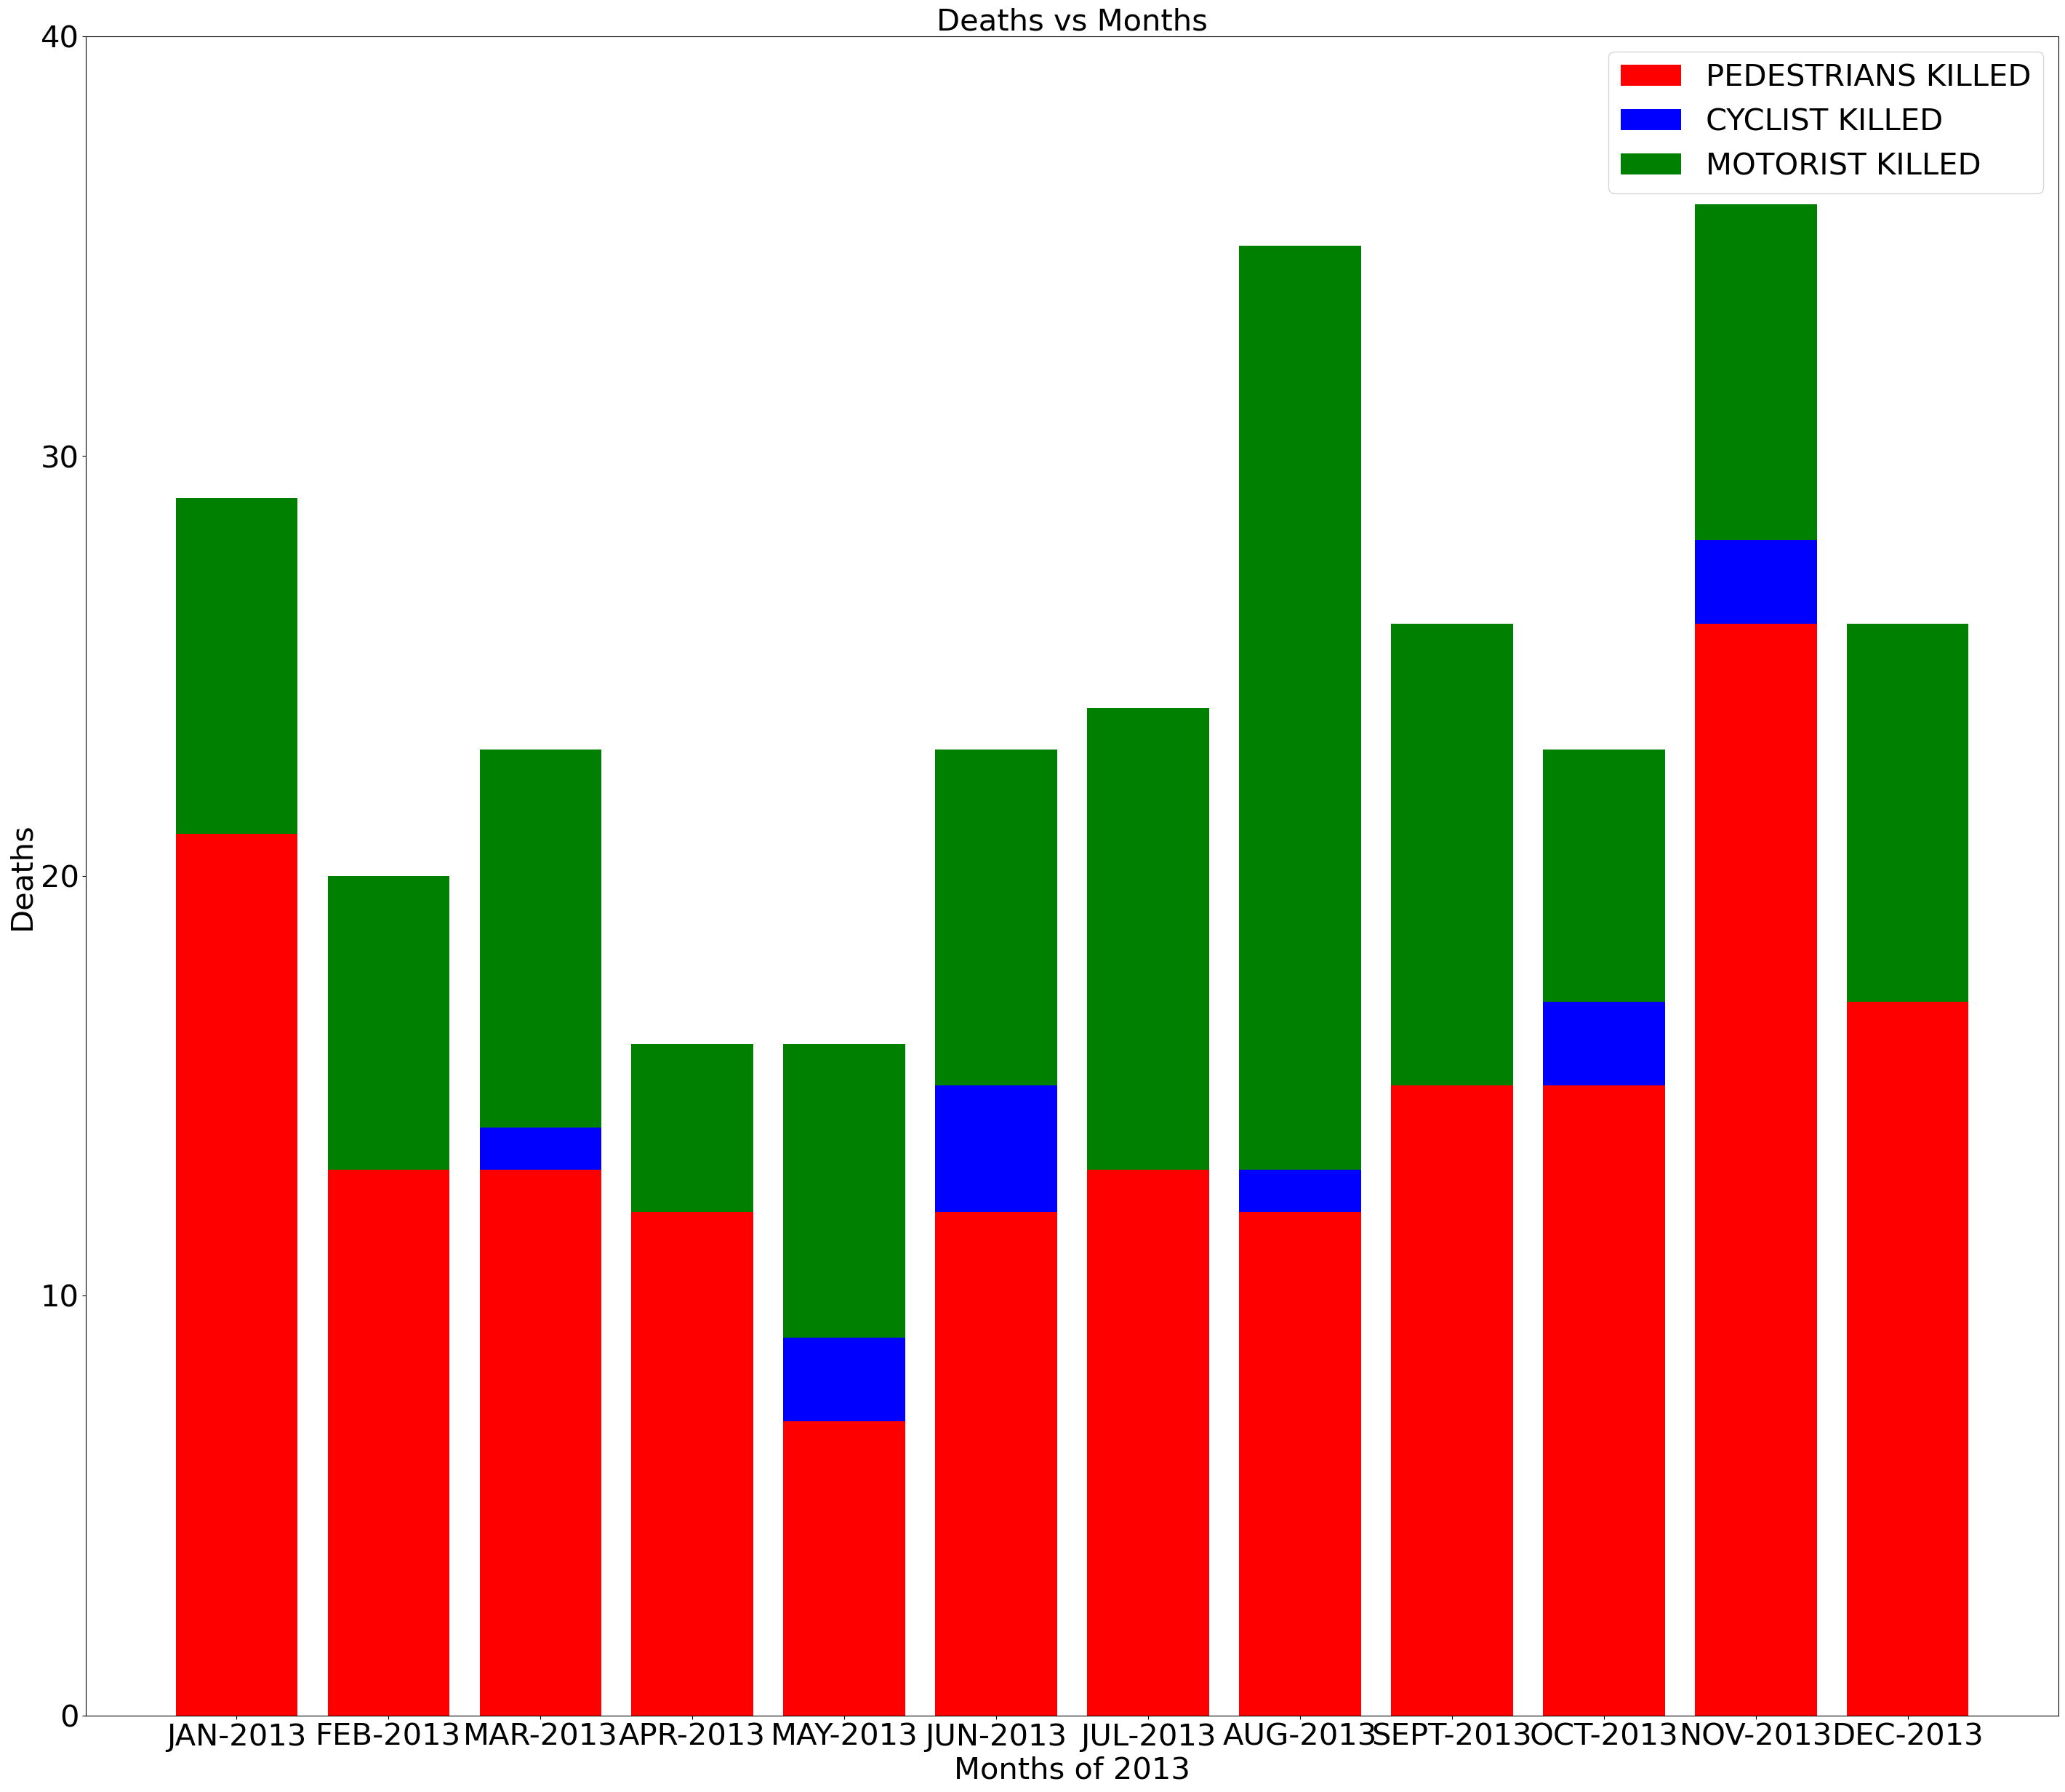

In [46]:
df1 = df[df['CRASH DATE']>='2013-01-01']
df1 = df1[df1['CRASH DATE']<='2013-12-31']
df1.sort_values(by='CRASH DATE',inplace=True)
df1

def custom_month_func(row):
    if row['CRASH DATE']>="2013-01-01" and row['CRASH DATE']<="2013-01-31":
        return "JAN-2013"
    elif row['CRASH DATE']>="2013-02-01" and row['CRASH DATE']<="2013-02-28":
        return "FEB-2013"
    elif row['CRASH DATE']>="2012-03-01" and row['CRASH DATE']<="2013-03-31":
        return "MAR-2013"
    elif row['CRASH DATE']>="2013-04-01" and row['CRASH DATE']<="2013-04-30":
        return "APR-2013"
    elif row['CRASH DATE']>="2013-05-01" and row['CRASH DATE']<="2013-05-31":
        return "MAY-2013"
    elif row['CRASH DATE']>="2013-06-01"and row['CRASH DATE']<="2013-06-30":
        return "JUN-2013"
    if row['CRASH DATE']>="2013-07-01" and row['CRASH DATE']<="2013-07-31":
        return "JUL-2013"
    elif row['CRASH DATE']>="2013-08-01" and row['CRASH DATE']<="2013-08-31":
        return "AUG-2013"
    elif row['CRASH DATE']>="2013-09-01" and row['CRASH DATE']<="2013-09-30":
        return "SEPT-2013"
    elif row['CRASH DATE']>="2013-10-01" and row['CRASH DATE']<="2013-10-31":
        return "OCT-2013"
    elif row['CRASH DATE']>="2013-11-01" and row['CRASH DATE']<="2013-11-30":
        return "NOV-2013"
    elif row['CRASH DATE']>="2013-12-01"and row['CRASH DATE']<="2013-12-31":
        return "DEC-2013"
df1['CRASH_MONTH'] = df1.apply(custom_month_func,axis=1)
df1
# dict is for killed and first is ped, second is cyclist, and the third is motorist.
dict = {
    "JAN-2013":[0,0,0],
    "FEB-2013":[0,0,0],
    "MAR-2013":[0,0,0],
    "APR-2013":[0,0,0],
    "MAY-2013":[0,0,0],
    "JUN-2013":[0,0,0],
    'JUL-2013':[0,0,0],
    'AUG-2013':[0,0,0],
    'SEPT-2013':[0,0,0],
    'OCT-2013':[0,0,0],
    'NOV-2013':[0,0,0],
    'DEC-2013':[0,0,0]
}
for i,row in df1.iterrows():
    if row['CRASH_MONTH']=='JAN-2013':
        dict['JAN-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['JAN-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['JAN-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='FEB-2013':
        dict['FEB-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['FEB-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['FEB-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='MAR-2013':
        dict['MAR-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['MAR-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['MAR-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='APR-2013':
        dict['APR-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['APR-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['APR-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='MAY-2013':
        dict['MAY-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['MAY-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['MAY-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='JUN-2013':
        dict['JUN-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['JUN-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['JUN-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='JUL-2013':
        dict['JUL-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['JUL-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['JUL-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='AUG-2013':
        dict['AUG-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['AUG-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['AUG-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='SEPT-2013':
        dict['SEPT-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['SEPT-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['SEPT-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='OCT-2013':
        dict['OCT-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['OCT-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['OCT-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='NOV-2013':
        dict['NOV-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['NOV-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['NOV-2013'][2]+=row['NUMBER OF MOTORIST KILLED']
    elif row['CRASH_MONTH']=='DEC-2013':
        dict['DEC-2013'][0]+=row['NUMBER OF PEDESTRIANS KILLED']
        dict['DEC-2013'][1]+=row['NUMBER OF CYCLIST KILLED']
        dict['DEC-2013'][2]+=row['NUMBER OF MOTORIST KILLED']

print(dict)
df2=pd.DataFrame.from_dict(dict,orient='index',columns=['PEDESTRIANS KILLED','CYCLIST KILLED','MOTORIST KILLED'])
df2
# print(df2.index)

plt.bar(df2.index,df2['PEDESTRIANS KILLED'],color='r')
plt.bar(df2.index,df2['CYCLIST KILLED'],bottom=df2['PEDESTRIANS KILLED'],color='b')
plt.bar(df2.index,df2['MOTORIST KILLED'],bottom=df2['CYCLIST KILLED']+df2['PEDESTRIANS KILLED'],color='g')
# plt.set_x
plt.xlabel('Months of 2013',fontsize=30)
plt.ylabel("Deaths",fontsize=30)
plt.legend(["PEDESTRIANS KILLED", "CYCLIST KILLED", "MOTORIST KILLED"])
plt.title("Deaths vs Months",fontsize=30)
plt.yticks([0,10,20,30,40])
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.rc('legend', fontsize=30)  
plt.rcParams['figure.figsize']=[25,25]
plt.show()

{'JAN-2013': [1113, 192, 2738], 'FEB-2013': [984, 131, 2447], 'MAR-2013': [988, 195, 3004], 'APR-2013': [901, 290, 3246], 'MAY-2013': [982, 400, 3643], 'JUN-2013': [972, 508, 3630], 'JUL-2013': [854, 470, 3762], 'AUG-2013': [856, 524, 3469], 'SEPT-2013': [999, 479, 3514], 'OCT-2013': [1066, 429, 3347], 'NOV-2013': [1106, 282, 3317], 'DEC-2013': [1167, 175, 2943]}


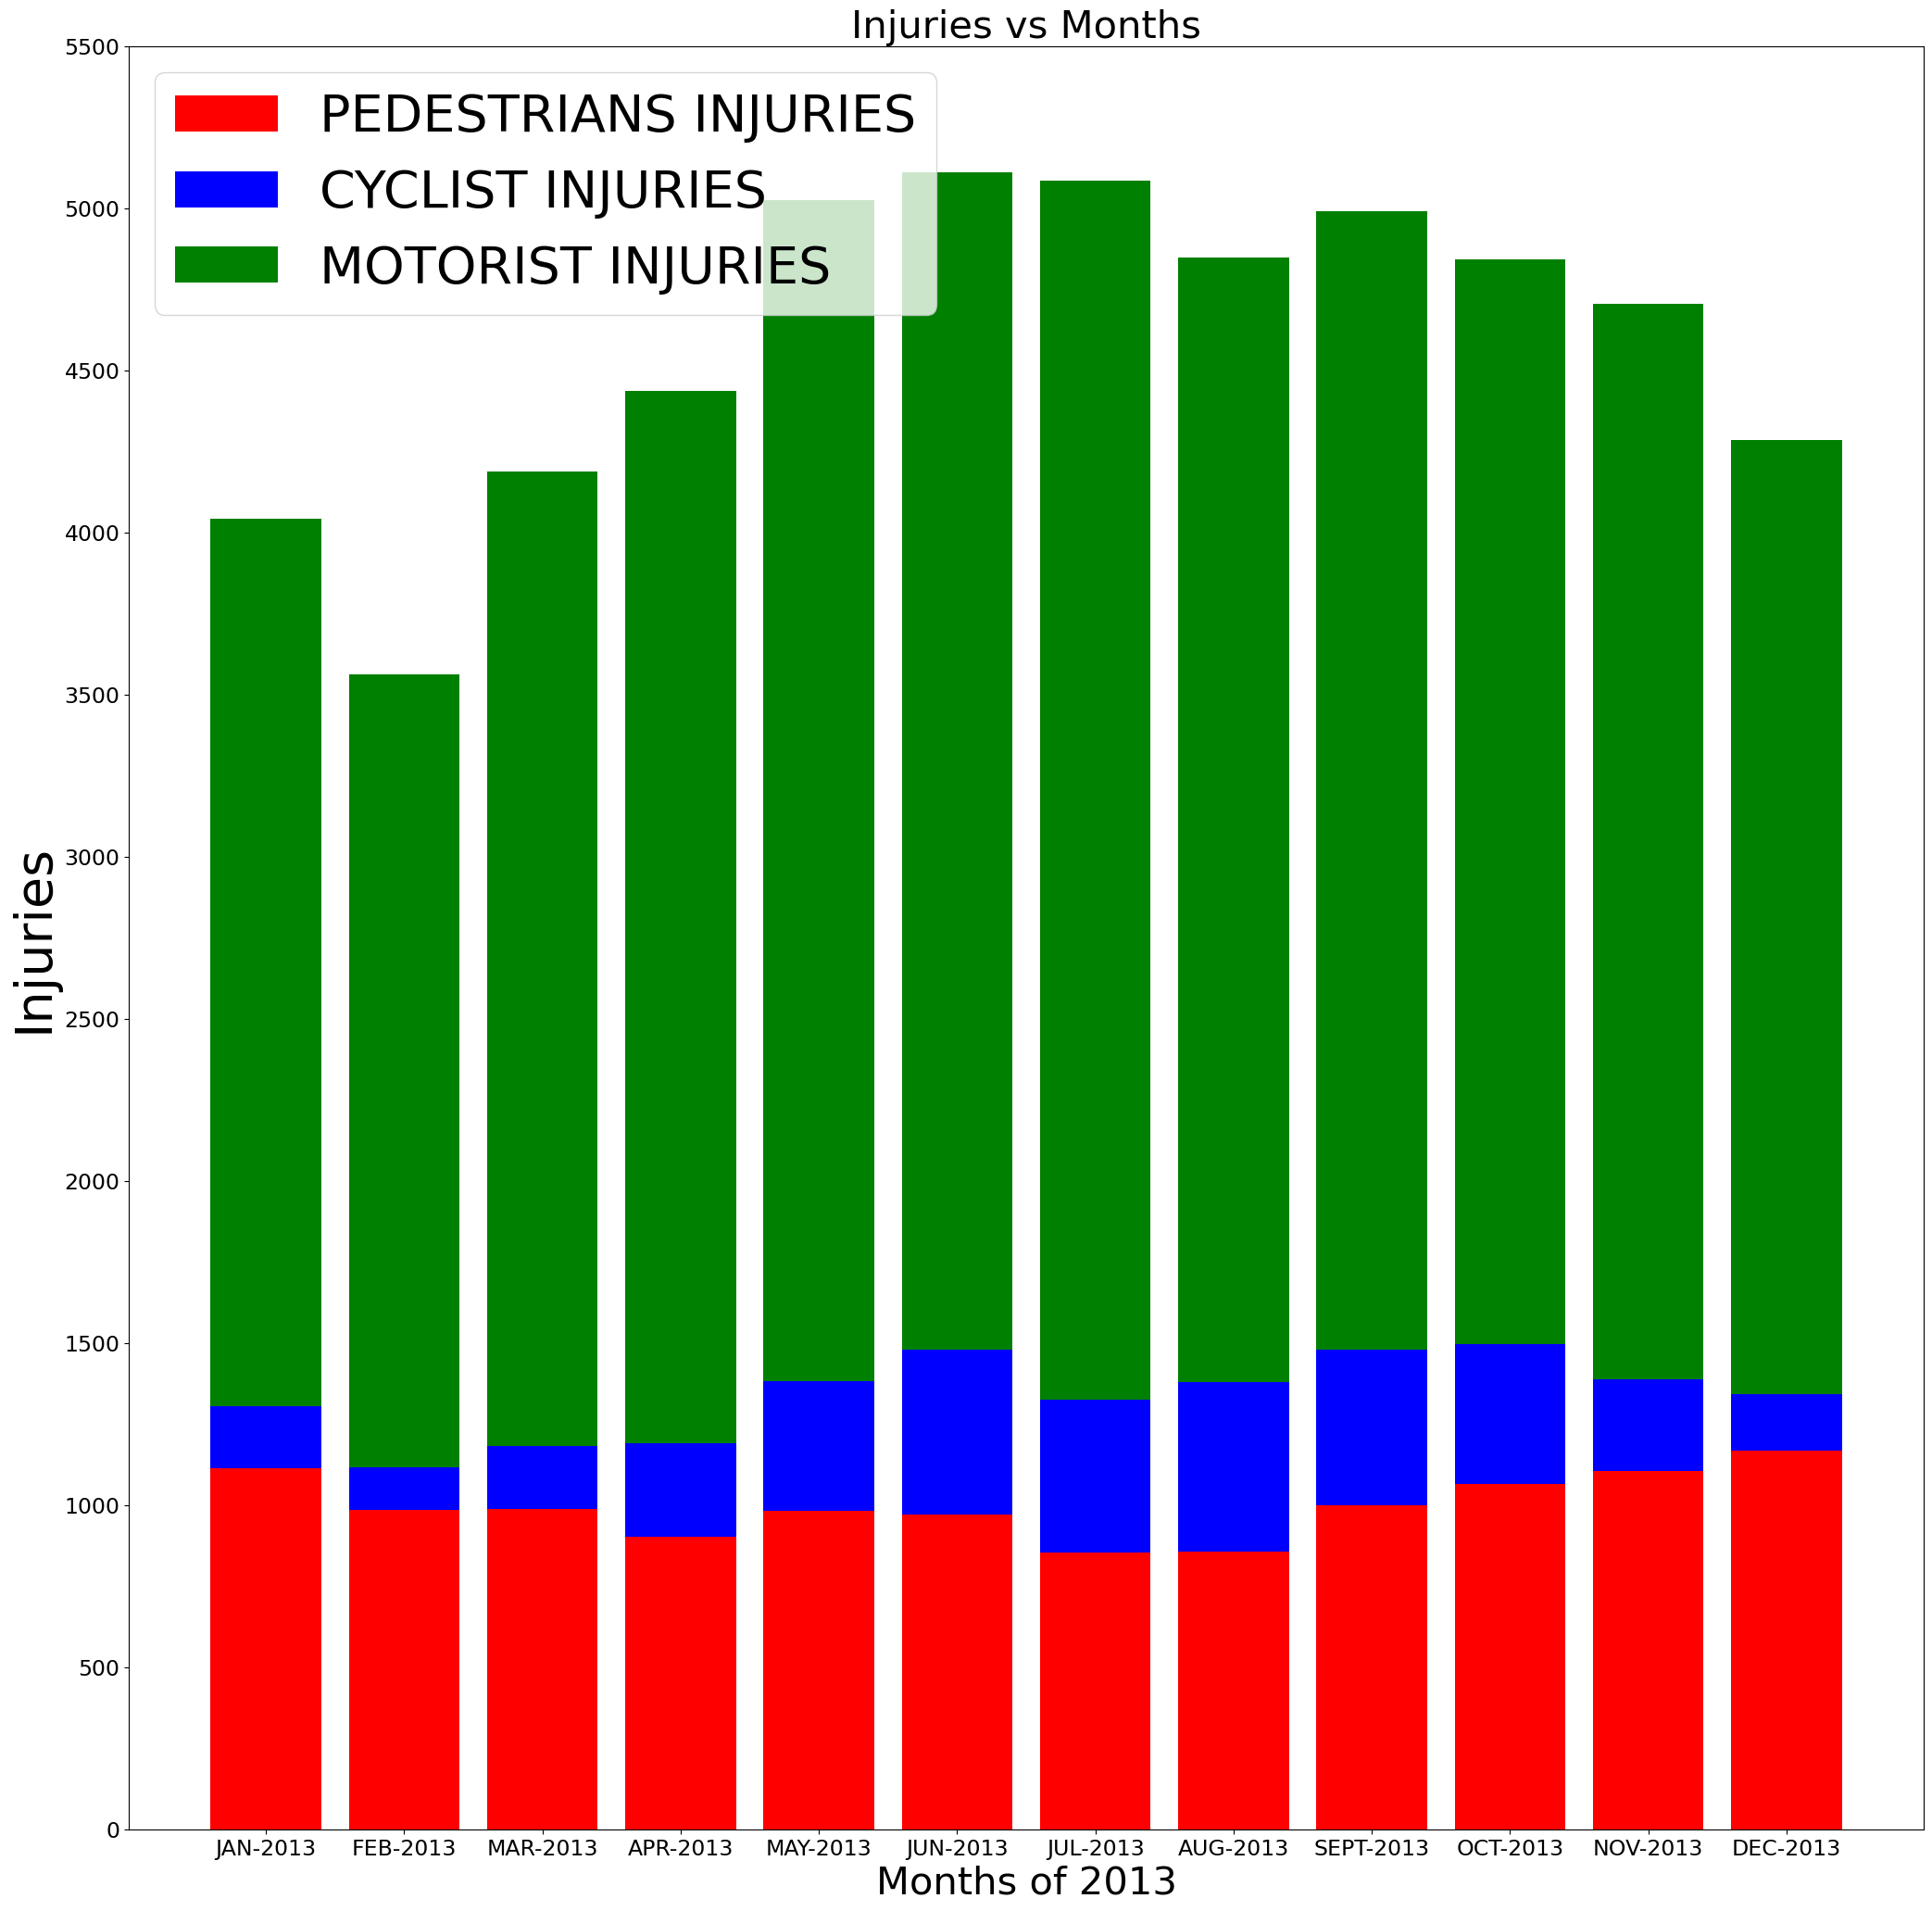

In [58]:
df1 = df[df['CRASH DATE']>='2013-01-01']
df1 = df1[df1['CRASH DATE']<='2013-12-31']
df1.sort_values(by='CRASH DATE',inplace=True)
df1

def custom_month_func(row):
    if row['CRASH DATE']>="2013-01-01" and row['CRASH DATE']<="2013-01-31":
        return "JAN-2013"
    elif row['CRASH DATE']>="2013-02-01" and row['CRASH DATE']<="2013-02-28":
        return "FEB-2013"
    elif row['CRASH DATE']>="2012-03-01" and row['CRASH DATE']<="2013-03-31":
        return "MAR-2013"
    elif row['CRASH DATE']>="2013-04-01" and row['CRASH DATE']<="2013-04-30":
        return "APR-2013"
    elif row['CRASH DATE']>="2013-05-01" and row['CRASH DATE']<="2013-05-31":
        return "MAY-2013"
    elif row['CRASH DATE']>="2013-06-01"and row['CRASH DATE']<="2013-06-30":
        return "JUN-2013"
    if row['CRASH DATE']>="2013-07-01" and row['CRASH DATE']<="2013-07-31":
        return "JUL-2013"
    elif row['CRASH DATE']>="2013-08-01" and row['CRASH DATE']<="2013-08-31":
        return "AUG-2013"
    elif row['CRASH DATE']>="2013-09-01" and row['CRASH DATE']<="2013-09-30":
        return "SEPT-2013"
    elif row['CRASH DATE']>="2013-10-01" and row['CRASH DATE']<="2013-10-31":
        return "OCT-2013"
    elif row['CRASH DATE']>="2013-11-01" and row['CRASH DATE']<="2013-11-30":
        return "NOV-2013"
    elif row['CRASH DATE']>="2013-12-01"and row['CRASH DATE']<="2013-12-31":
        return "DEC-2013"
df1['CRASH_MONTH'] = df1.apply(custom_month_func,axis=1)
df1
# dict is for injured and first is ped, second is cyclist, and the third is motorist.
dict = {
    "JAN-2013":[0,0,0],
    "FEB-2013":[0,0,0],
    "MAR-2013":[0,0,0],
    "APR-2013":[0,0,0],
    "MAY-2013":[0,0,0],
    "JUN-2013":[0,0,0],
    'JUL-2013':[0,0,0],
    'AUG-2013':[0,0,0],
    'SEPT-2013':[0,0,0],
    'OCT-2013':[0,0,0],
    'NOV-2013':[0,0,0],
    'DEC-2013':[0,0,0]
}
for i,row in df1.iterrows():
    if row['CRASH_MONTH']=='JAN-2013':
        dict['JAN-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['JAN-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['JAN-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='FEB-2013':
        dict['FEB-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['FEB-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['FEB-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='MAR-2013':
        dict['MAR-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['MAR-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['MAR-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='APR-2013':
        dict['APR-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['APR-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['APR-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='MAY-2013':
        dict['MAY-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['MAY-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['MAY-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='JUN-2013':
        dict['JUN-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['JUN-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['JUN-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='JUL-2013':
        dict['JUL-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['JUL-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['JUL-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='AUG-2013':
        dict['AUG-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['AUG-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['AUG-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='SEPT-2013':
        dict['SEPT-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['SEPT-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['SEPT-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='OCT-2013':
        dict['OCT-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['OCT-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['OCT-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='NOV-2013':
        dict['NOV-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['NOV-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['NOV-2013'][2]+=row['NUMBER OF MOTORIST INJURED']
    elif row['CRASH_MONTH']=='DEC-2013':
        dict['DEC-2013'][0]+=row['NUMBER OF PEDESTRIANS INJURED']
        dict['DEC-2013'][1]+=row['NUMBER OF CYCLIST INJURED']
        dict['DEC-2013'][2]+=row['NUMBER OF MOTORIST INJURED']

print(dict)
df2=pd.DataFrame.from_dict(dict,orient='index',columns=['PEDESTRIANS INJURED','CYCLIST INJURED','MOTORIST INJURED'])
df2
# print(df2.index)

plt.bar(df2.index,df2['PEDESTRIANS INJURED'],color='r')
plt.bar(df2.index,df2['CYCLIST INJURED'],bottom=df2['PEDESTRIANS INJURED'],color='b')
plt.bar(df2.index,df2['MOTORIST INJURED'],bottom=df2['CYCLIST INJURED']+df2['PEDESTRIANS INJURED'],color='g')
# plt.set_x
plt.xlabel('Months of 2013',fontsize=20)
plt.ylabel("Injuries",fontsize=20)
plt.legend(["PEDESTRIANS INJURIES", "CYCLIST INJURIES", "MOTORIST INJURIES"])
plt.title("Injuries vs Months",fontsize=30)
plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17) 
plt.rc('legend', fontsize=20)  
plt.rcParams['figure.figsize']=[25,25]
plt.show()